In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Loan Eligibility Prediction.csv')
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.isna().sum()

Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.dtypes

Customer_ID             int64
Gender                 object
Married                object
Dependents              int64
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Loan_Amount_Term        int64
Credit_History          int64
Property_Area          object
Loan_Status            object
dtype: object

## EDA

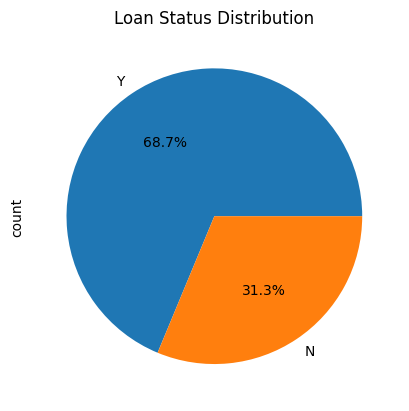

In [6]:
df['Loan_Status'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()

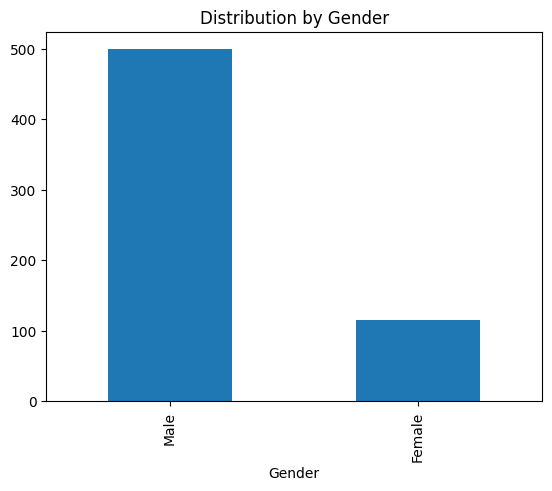

In [7]:
df['Gender'].value_counts().plot(kind='bar',title='Distribution by Gender')
plt.show()

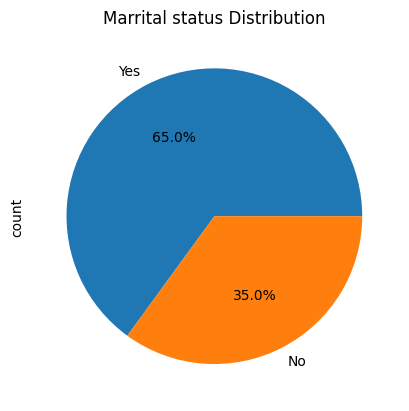

In [8]:
df['Married'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Marrital status Distribution')
plt.show()

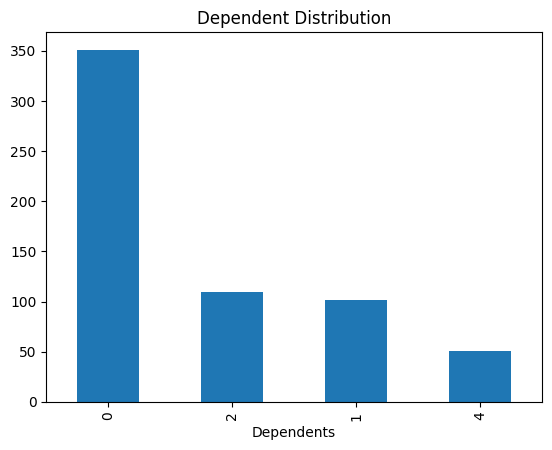

In [9]:
df['Dependents'].value_counts().plot(kind='bar')
plt.title('Dependent Distribution')
plt.show()

### Do longer loan terms correlate with higher approval rates?

In [10]:
pd.crosstab(df['Loan_Amount_Term'], 
            df['Loan_Status'], 
            normalize='index') * 100

Loan_Status,N,Y
Loan_Amount_Term,,
12,0.000000,100.000000
36,100.000000,0.000000
60,0.000000,100.000000
84,25.000000,75.000000
120,33.333333,66.666667
180,34.090909,65.909091
240,25.000000,75.000000
300,38.461538,61.538462
360,29.980658,70.019342


### is there a relationship between credit history and load status

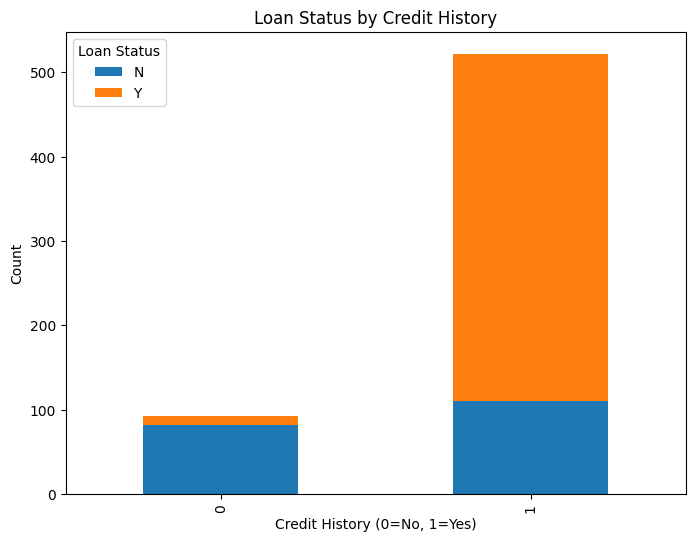

In [11]:
pd.crosstab(df['Credit_History'], 
            df['Loan_Status']).plot(kind='bar', 
                                           stacked=True,
                                           figsize=(8, 6))
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

loans of people with credit history tends to get approved more

### Is credit history the strongest predictor of loan approval

In [12]:
# Convert categorical to numeric
loan_encoded = df.copy()
loan_encoded['Loan_Status_Numeric'] = loan_encoded['Loan_Status'].map({'Y': 1, 'N': 0})
loan_encoded['Gender_Numeric'] = loan_encoded['Gender'].map({'Male': 1, 'Female': 0})
loan_encoded['Married_Numeric'] = loan_encoded['Married'].map({'Yes': 1, 'No': 0})
loan_encoded['Education_Numeric'] = loan_encoded['Education'].map({'Graduate': 1, 'Not Graduate': 0})

# Calculate correlation with loan status
correlations = loan_encoded[['Credit_History', 'Gender_Numeric', 'Married_Numeric', 
                              'Education_Numeric', 'Applicant_Income', 
                              'Loan_Status_Numeric']].corr()['Loan_Status_Numeric'].sort_values(ascending=False)
print(correlations)

Loan_Status_Numeric    1.000000
Credit_History         0.523961
Married_Numeric        0.086673
Education_Numeric      0.085884
Gender_Numeric         0.009357
Applicant_Income      -0.004710
Name: Loan_Status_Numeric, dtype: float64


credit history is the strongest predictor of loan approval

### Does higher income correlate with higher loan approval probability?

In [15]:
df.groupby('Loan_Status')['Applicant_Income'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: Applicant_Income, dtype: float64

In [16]:
df['total_income'] = df['Applicant_Income'] + df['Coapplicant_Income']
df.groupby('Loan_Status')['total_income'].mean()

Loan_Status
N    7323.885417
Y    6888.585118
Name: total_income, dtype: float64

Higher income does NOT correlate with higher approval rates

### What is the distribution of loan amounts and loan amounts term ?

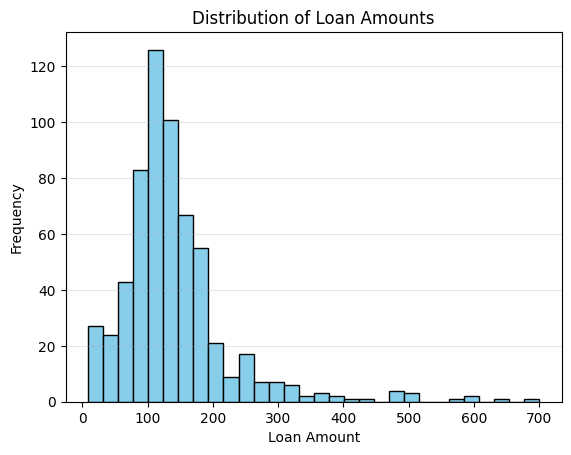

In [20]:
plt.hist(df['Loan_Amount'], bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.grid(axis='y', alpha=0.3)
plt.show()

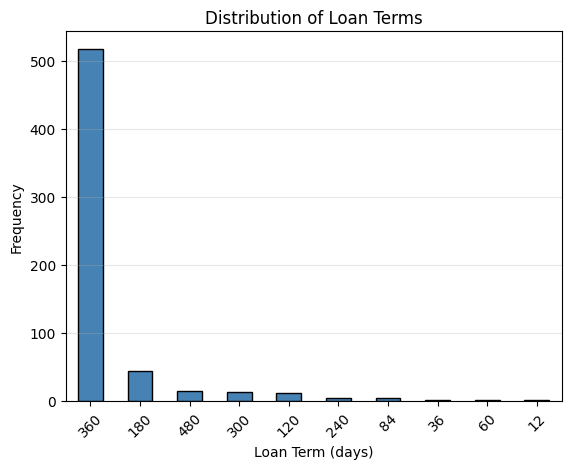

In [27]:
df['Loan_Amount_Term'].value_counts().plot(kind='bar',color='steelblue', edgecolor='black')
plt.xlabel('Loan Term (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Terms')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

### What is the relationship between applicant income and loan amount

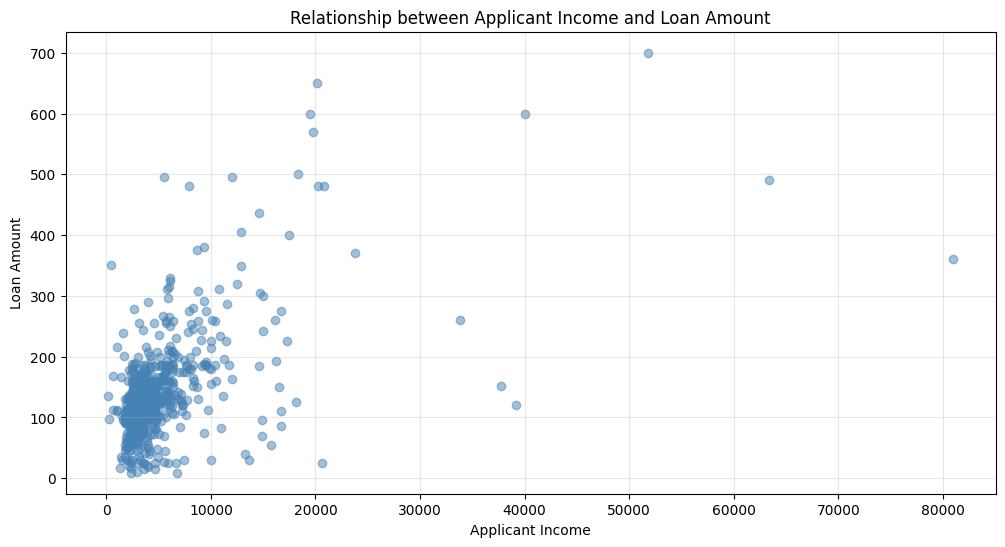

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(df['Applicant_Income'], df['Loan_Amount'], alpha=0.5, color='steelblue')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Applicant Income and Loan Amount')
plt.grid(alpha=0.3)
plt.show()

The scatter plot reveals a positive but weak correlation between Applicant Income and Loan Amount. The majority of data points are clustered in the lower-left corner, indicating that most applicants have lower incomes (under 20,000) and request smaller loan amounts (generally below 200).

### What property areas request the highest loan amounts?

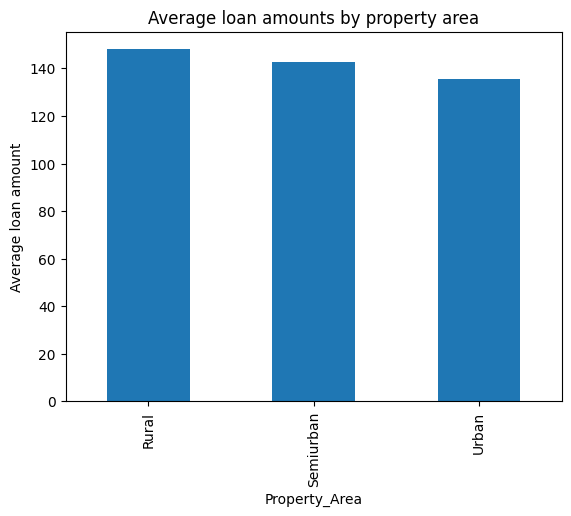

In [44]:
df.groupby('Property_Area')['Loan_Amount'].mean().plot(kind='bar',title='Average loan amounts by property area')
plt.ylabel('Average loan amount')
plt.show()

### Does property area (Urban / Semiurban / Rural) influence approval?

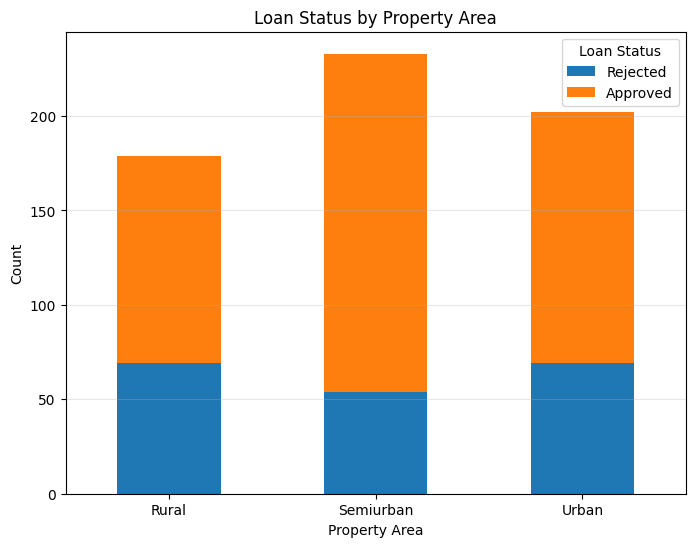

In [53]:
pd.crosstab(df['Property_Area'], df['Loan_Status']).plot(kind='bar',stacked=True,figsize=(8, 6))
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Loan Status by Property Area')
plt.legend(['Rejected', 'Approved'], title='Loan Status')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

### Which features are most important in predicting loan approval?

In [56]:
loan_ml = df.copy()
loan_ml['Loan_Status_Numeric'] = loan_ml['Loan_Status'].map({'N':0,'Y':1})

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    loan_ml[col + '_Encoded'] = le.fit_transform(loan_ml[col].astype(str))

In [67]:
# Calculate correlations
correlations = loan_ml[[
    'Gender_Encoded', 'Married_Encoded', 'Dependents_Encoded', 
    'Education_Encoded', 'Self_Employed_Encoded', 
    'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 
    'Loan_Amount_Term', 'Credit_History', 'Property_Area_Encoded',
    'Loan_Status_Numeric'
]].corr()['Loan_Status_Numeric'].drop('Loan_Status_Numeric').abs().sort_values(ascending=False)
correlations

Credit_History           0.523961
Married_Encoded          0.086673
Education_Encoded        0.085884
Coapplicant_Income       0.059187
Property_Area_Encoded    0.032112
Loan_Amount              0.014318
Gender_Encoded           0.009357
Loan_Amount_Term         0.006488
Self_Employed_Encoded    0.005379
Applicant_Income         0.004710
Dependents_Encoded       0.001848
Name: Loan_Status_Numeric, dtype: float64

Best features for predicting loan status (in order):

1. Credit_History (Essential - 52%)
2. Married (Important - 9%)
3. Education (Important - 9%)
4. Coapplicant_Income (Helpful - 6%)
5. Property_Area (Minor - 3%)